In [67]:
import matplotlib.pyplot as plt
import numpy as np

In [68]:
file_data = open("EKF_45deg1_data_cleaned.txt","r")

In [69]:
time = []
data = []

Acc_x = []
Acc_y = []
Acc_z = []

Gyro_x = []
Gyro_y = []
Gyro_z = []

Mag_x = []
Mag_y = []
Mag_z = []

sAx = 0.0
sAy = 0.0 
sAz = 0.0
sWx = 0.0
sWy = 0.0
sWz = 0.0
sMx = 0.0
sMy = 0.0
sMz = 0.0


bAx = 0.0
bAy = 0.0 
bAz = 0.0
bWx = 0.0
bWy = 0.0
bWz = 0.0
bMx = 0.0
bMy = 0.0
bMz = 0.0


currentSample = 0
dt = 0.00635

In [70]:
for l in file_data.readlines():
    try:
        temp = l.split(' ')

        Gyro_x.append(float(temp[0]))
        Gyro_y.append(float(temp[1]))
        Gyro_z.append(float(temp[2]))
    
        Acc_x.append(float(temp[3]))
        Acc_y.append(float(temp[4]))
        Acc_z.append(float(temp[5]))

        Mag_x.append(float(temp[6]))
        Mag_y.append(float(temp[7]))
        Mag_z.append(float(temp[8]))
            # data = np.array(data)
        currentSample += dt
        time.append(currentSample)
    except Exception as e:
        print(e)


file_data.close()

In [71]:
Acc_x = np.array(Acc_x)
Acc_y = np.array(Acc_y)
Acc_z = np.array(Acc_z)

Gyro_x = np.array(Gyro_x)
Gyro_y = np.array(Gyro_y)
Gyro_z = np.array(Gyro_z)

Mag_x = np.array(Mag_x)
Mag_y = np.array(Mag_y)
Mag_z = np.array(Mag_z)



In [72]:
bAx = Acc_x.mean()
sAx = Acc_x.std()

bAy = Acc_y.mean()
sAy = Acc_y.std()

bAz = 16384 - Acc_z.mean()
sAz = Acc_z.std()

bWx = Gyro_x.mean()
sWx = Gyro_x.std()

bWy = Gyro_y.mean()
sWy = Gyro_y.std()

bWz =  Gyro_z.mean()
sWz = Gyro_z.std()

# Acc_x = (Acc_x)/16384
# Acc_y = (Acc_y)/16384
# Acc_z = (Acc_z)/16384

# print(Acc_x.mean())
print(Acc_x.std()/16384)

# print(Acc_y.mean())
print(Acc_y.std()/16384)

# print(Acc_z)
print(Acc_z.std()/16384)

# print(Gyro_x.mean())
print(Gyro_x.std()/16.4)

# print(Gyro_y.mean())
print(Gyro_y.std()/16.4)

# print(Gyro_z.mean())
print(Gyro_z.std()/16.4)


0.056995678108650104
0.0157029932127452
0.03814905904184546
1.225063269295448
4.067161921593814
10.132749420363147


In [73]:
q = np.array([1,0,0,0])
x = np.array([1,0,0,0])
bw = np.array([-27.12032, 18.3283232832,-15.6256062561])

bw_ = bw/(16.4*180)*np.pi
ba_ = np.array([bAx,bAy,bAz])
x_ = np.append(q,bw_)
print(x_)


[ 1.          0.          0.          0.         -0.02886213  0.01950546
 -0.01662916]


In [74]:
data_len = []

data_len.append(Gyro_x.shape[0])
data_len.append(Gyro_y.shape[0])
data_len.append(Gyro_z.shape[0])

data_len.append(Acc_x.shape[0])
data_len.append(Acc_y.shape[0])
data_len.append(Acc_z.shape[0])

data_len.append(Mag_x.shape[0])
data_len.append(Mag_y.shape[0])
data_len.append(Mag_z.shape[0])


w = np.concatenate([Gyro_x[0:min(data_len)],Gyro_y[0:min(data_len)],Gyro_z[0:min(data_len)]], axis=0)

data_len = []
data_len.append(Acc_x.shape[0])
data_len.append(Acc_y.shape[0])
data_len.append(Acc_z.shape[0])

a = np.concatenate((Acc_x[0:min(data_len)],Acc_y[0:min(data_len)],Acc_z[0:min(data_len)]), axis=0)
 
data_len = []
data_len.append(Mag_x.shape[0])
data_len.append(Mag_y.shape[0])
data_len.append(Mag_z.shape[0])

m = np.concatenate((Mag_x[0:min(data_len)],Mag_y[0:min(data_len)],Mag_z[0:min(data_len)]),axis=0)

a = np.reshape(a[0:3*min(data_len)],(-1,min(data_len)))
w = np.reshape(w[0:3*min(data_len)],(-1,min(data_len)))
m = np.reshape(m[0:3*min(data_len)],(-1,min(data_len)))
print(m)


[[-0.98 -1.01 -0.96 ... -0.98 -0.96 -0.94]
 [-0.47 -0.51 -0.46 ... -0.58 -0.52 -0.52]
 [ 0.3   0.26  0.28 ...  0.19  0.22  0.2 ]]


In [75]:
P = np.identity(7) * 0.1
Q = np.identity(7) * 0.001
R = np.identity(3) * 0.01
quat = []
quat1 = []
quat2 = []

quat_ = []
quat1_ = []
quat2_ = []
def quat_rot(a,w,t):
    w1 = w/(16.4*180)*np.pi
#     w = (w - bw)/(16.4*180)*np.pi
    
    a = a/16384
    global q,x,x_,P
    g = 9.81
    
    
#     print(x_)
    q_mul = np.array([[-x_[1],-x_[2],-x_[3]],
                      [x_[0], -x_[3],x_[2]],
                      [x_[3], x_[0], -x_[1]],
                      [-x_[2], x_[1],x_[0]]])
    Sq = q_mul*0.5*t
#     print(q_mul)
#     print(Sq)  
    F1 = np.append(np.eye(4),-Sq,axis = -1)
    F2 = np.append(np.zeros((3,4)),np.eye(3),axis = -1) 
    A = np.append(F1,F2,axis = 0)
    B = np.append(Sq,np.zeros((3,3)),axis = 0)
#     print(np.round(A,decimals=3))
#     print(np.round(B,decimals=3))
    w_rot = np.array([[0,-w[0],-w[1],-w[2]],
                      [w[0],0, w[2], -w[1]],
                      [w[1],-w[2],0,w[0]],
                      [w[2],w[1],-w[0],0]])
    
#     print(np.round(A,decimals = 3))
    x_ = np.dot(A,x_) +  np.dot(B,w1)
    P = np.dot(np.dot(A,P),np.transpose(A)) + Q
        
    C1 = np.array([[ -2*x_[2], -2*x_[3], -2*x_[0], -2*x_[1]],
                  [  2*x_[1],  2*x_[0], -2*x_[3], -2*x_[2]],
                  [ -2*x_[0],  2*x_[1],  2*x_[2], -2*x_[3]]])
    C1 = -C1
    
    H = np.append(C1, np.zeros((3,3)),axis = -1)

    
    S = np.dot(np.dot(H, P),np.transpose(H)) + R
    K = np.dot(np.dot(P,np.transpose(H)),np.linalg.inv(S)) 
#     print(H.shape)
    x_ = x_ + np.dot(K,(a-np.dot(H,x_)))
    x_ = x_/(np.sqrt(x_[0]**2 + x_[1]**2 + x_[2]**2 +x_[3]**2))
    P = np.dot((np.eye(7) - np.dot(K,H)),P)
    
#     print(a)
    quat_.append(np.arctan(2*(x_[0]*x_[3] + x_[1]*x_[2])/(1- 2*(x_[2]*x_[2] + x_[3]*x_[3])))*180/np.pi)
    
    quat1_.append(np.arcsin(2*(x_[0]*x_[2] - x_[1]*x_[3]))*180/np.pi)
    quat2_.append(np.arctan(2*(x_[0]*x_[1] + x_[3]*x_[2])/(1- 2*(x_[2]*x_[2] + x_[1]*x_[1])))*180/np.pi)

In [76]:
for (index,i) in enumerate(np.transpose(a)):
#     print(m[:,index])
    
    quat_rot(i,w[:,index],0.003)

4993


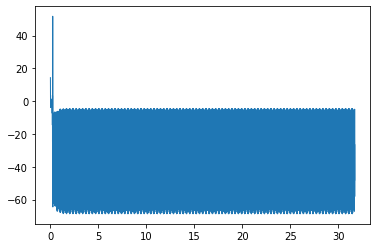

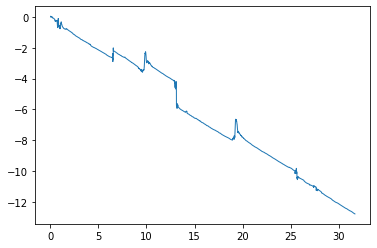

In [77]:
print(len(quat1_))
plt.plot(time,quat1_,label='gyro_angle drift',linewidth=1)
plt.show()
gyro_angle = []
gyro_tmp = 0
for (i,t) in enumerate(time[0:100000]):
    gyro_tmp = gyro_tmp + dt*((Gyro_y[i]  - 18.3283232832)/16.4)
    gyro_angle.append(gyro_tmp)

plt.plot(time,gyro_angle,label='gyro_angle drift',linewidth=1)
plt.show()


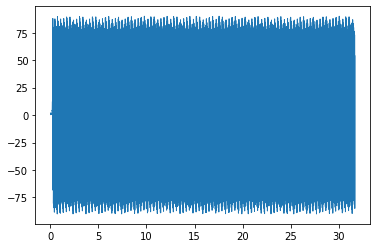

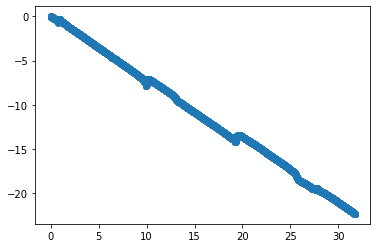

In [78]:
plt.plot(time,quat2_,label='gyro_angle drift',linewidth=1)
plt.show()
gyro_angle = []
gyro_tmp = 0
for (i,t) in enumerate(time[0:100000]):
    gyro_tmp = gyro_tmp + dt*((Gyro_x[i]  + 27.12032)/16.4)
    gyro_angle.append(gyro_tmp)

plt.scatter(time,gyro_angle,label='gyro_angle drift',linewidth=1)
plt.show()


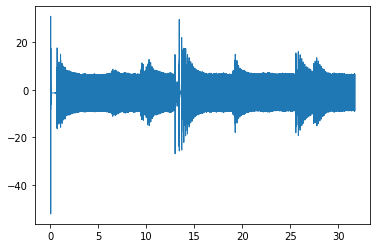

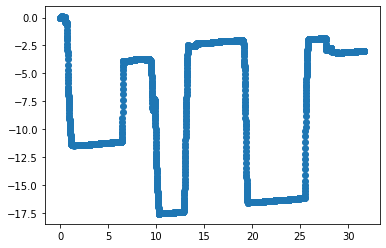

In [61]:
plt.plot(time,quat_,label='gyro_angle drift',linewidth=1)
plt.show()
gyro_angle = []
gyro_tmp = 0
for (i,t) in enumerate(time[0:100000]):
    gyro_tmp = gyro_tmp + dt*((Gyro_z[i]  + 15.6256062561)/16.4)
    gyro_angle.append(gyro_tmp)

plt.scatter(time,gyro_angle,label='gyro_angle drift',linewidth=1)
plt.show()


In [64]:
pitch = []
roll = []
print(a.shape)
def euler_accel(a,t):
    pitch.append(np.arctan((a[1] - bAy) /(a[2] - bAz))/np.pi*180)
    roll.append(np.arctan(-(a[0] - bAx)/np.sqrt((a[1] - bAy)**2 + (a[2] - bAz)**2))/np.pi*180)

(3, 4993)


In [65]:
for i in np.transpose(a):
    
    euler_accel(i,0.003)


4993
4993


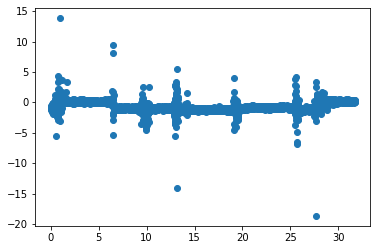

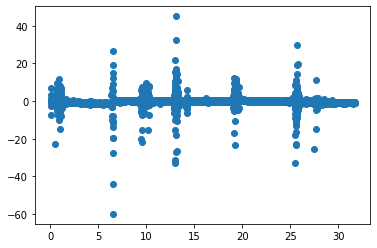

In [66]:
print(len(pitch))
print(len(time))
plt.scatter(time,pitch,label='gyro_angle drift',linewidth=1)
plt.show()

plt.scatter(time,roll,label='gyro_angle drift',linewidth=1)
plt.show()

In [828]:
M_x1 = np.sort(Mx, axis=None , kind  = "quicksort") 
M_y1 = np.sort(My, axis=None, kind  = "quicksort")  
M_z1 = np.sort(Mz, axis=None ,kind  = "quicksort") 

print("max x: %0.2f min x: %0.2f ",M_x1[9999],M_x1[1000])
print("max y: %0.2f min y: %0.2f ",M_y1[9999],M_y1[0])
print("max z: %0.2f min z: %0.2f ",M_z1[9999],M_z1[10])


# M_y[np.where(M_y ==  6694.4)] = 145.28
# M_x[np.where(M_x >  654.06)] = 654.06
offset_x = (M_x1[9999] + M_x1[0]) / 2
offset_y = (M_y1[9999] + M_y1[0]) / 2
offset_z = (M_z1[9000] + M_z1[100]) / 2

print("offset x: %0.2f offset y: %0.2f offset z: %0.2f",offset_x,offset_y,offset_z)

# M_x = np.subtract(M_x, offset_x)
# M_y = np.subtract(M_y, offset_y)
# M_z = np.subtract(M_z, offset_z)
# ax = fig.gca(projection='3d')

# M = np.array((M_x,M_y,M_z))
# ax.scatter(M_x, M_y, M_z)
# print(M.shape)
# ax1 = fig.add_subplot(1, 2, 1)
fig, ax = plt.subplots(tight_layout=True)
# hist = ax1.hist(M_x)
# hist1 = ax1.hist(M_y)
# hist2 = ax.hist(M_zc)

# hist3 = ax.hist2d(M_x,M_y)
# hist4 = ax.hist2d(M_y,M_z)
# hist5 = ax.hist2d(M_z,M_x)
# print(max(M_zc))
# print(max(M_yc))
# print(max(M_xc))



avg_delta_x = (M_x1[9999] + M_x1[10]) / 2
avg_delta_y = (M_y1[9999] + M_y1[10]) / 2
avg_delta_z = (M_z1[9999] + M_z1[1000]) / 2
print("delta x: %0.2f delta y: %0.2f delta z: %0.2f",avg_delta_x,avg_delta_y,avg_delta_z)
avg_delta = (avg_delta_x + avg_delta_y + avg_delta_z) / 3

scale_x = avg_delta / avg_delta_x
scale_y = avg_delta / avg_delta_y
scale_z = avg_delta / avg_delta_z

print(scale_x)
print(scale_y)
print(scale_z)
# scale_x = 0.25
M_x = (M_x - offset_x) * scale_x
M_y = (M_y - offset_y) * scale_y
M_z = (M_z - offset_z) * scale_z
plt.autoscale(enable=True, axis='both', tight=None)
ax.set_xlim(-300, 300)
ax.set_ylim(-300,300)

ax.scatter(M_x, M_y, color = "red")
ax.scatter(M_x, M_z, color = "green")
ax.scatter(M_y, M_z, color = "blue")


# ax.scatter(M_x , M_y , M_z ,color = "green")
formatter = mticker.ScalarFormatter()
# ax.xaxis.set_major_formatter(formatter)
# ax.xaxis.set_major_locator(mticker.FixedLocator(np.arange(M_x.min()+1, M_x.max()+1, 20)))

# ax.yaxis.set_major_formatter(formatter)
# ax.yaxis.set_major_locator(mticker.FixedLocator(np.arange(M_y.min()+1, M_y.max()+1, 20)))

# ax.set_aspect("equal")
# ax.set_xlim3d(-200, 200)
# ax.set_ylim3d(-200,200)

# ax.set_zlim3d(-200,200)

# ax.scatter(M_x, M_y, M_z)

# plt.axis("equal")
plt.show()
    


NameError: name 'Mx' is not defined

In [15]:
def fitEllipsoid(magX, magY, magZ):
    a1 = magX ** 2
    a2 = magY ** 2
    a3 = magZ ** 2
    a4 = 2 * np.multiply(magY, magZ)
    a5 = 2 * np.multiply(magX, magZ)
    a6 = 2 * np.multiply(magX, magY)
    a7 = 2 * magX
    a8 = 2 * magY
    a9 = 2 * magZ
    a10 = np.ones(len(magX)).T
    D = np.array([a1, a2, a3, a4, a5, a6, a7, a8, a9, a10])

    # Eqn 7, k = 4
    C1 = np.array([[-1, 1, 1, 0, 0, 0],
                   [1, -1, 1, 0, 0, 0],
                   [1, 1, -1, 0, 0, 0],
                   [0, 0, 0, -4, 0, 0],
                   [0, 0, 0, 0, -4, 0],
                   [0, 0, 0, 0, 0, -4]])

    # Eqn 11
    S = np.matmul(D, D.T)
    S11 = S[:6, :6]
    S12 = S[:6, 6:]
    S21 = S[6:, :6]
    S22 = S[6:, 6:]

    # Eqn 15, find eigenvalue and vector
    # Since S is symmetric, S12.T = S21
    tmp = np.matmul(np.linalg.inv(C1), S11 - np.matmul(S12, np.matmul(np.linalg.inv(S22), S21)))
    eigenValue, eigenVector = np.linalg.eig(tmp)
    u1 = eigenVector[:, np.argmax(eigenValue)]

    # Eqn 13 solution
    u2 = np.matmul(-np.matmul(np.linalg.inv(S22), S21), u1)

    # Total solution
    u = np.concatenate([u1, u2]).T

    Q = np.array([[u[0], u[5], u[4]],
                  [u[5], u[1], u[3]],
                  [u[4], u[3], u[2]]])

    n = np.array([[u[6]],
                  [u[7]],
                  [u[8]]])

    d = u[9]

    return Q, n, d


In [16]:
Q,n,d = fitEllipsoid(Mag_x, Mag_y, Mag_z)

In [17]:
print(Q)
print(n)
print(d)


[[ -7.04141077e-01   1.24984645e-02  -3.84674661e-04]
 [  1.24984645e-02  -6.80592000e-01   2.69242286e-03]
 [ -3.84674661e-04   2.69242286e-03  -2.02030356e-01]]
[[-4664.84886227]
 [-4269.51504473]
 [ 5265.98428496]]
-5478504.42616


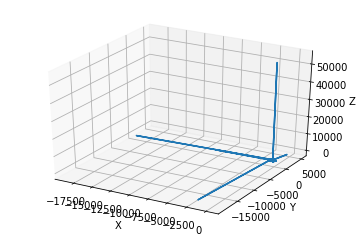

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111, projection='3d')

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')


u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax2.plot_wireframe(x, y, z, rstride=10, cstride=10, alpha=0.5)
ax2.plot_surface(x, y, z, alpha=0.3, color='b')

ax2.plot(Mag_x, Mag_y, Mag_z)
plt.show()


In [1]:
P = np.identity(4)* 0.1
Q = np.identity(4)* 0.001
R = np.identity(3) * 0.01

def quat_rot(a,w,t):
    w1 = w/(16.4*180)*np.pi
#     w = (w - bw)/(16.4*180)*np.pi
    
    a = a/16384
    global q,x,P
    g = 9.81
    
    

#     print(np.round(A,decimals=3))
#     print(np.round(B,decimals=3))
    w_rot = np.array([[0,-w[0],-w[1],-w[2]],
                      [w[0],0, w[2], -w[1]],
                      [w[1],-w[2],0,w[0]],
                      [w[2],w[1],-w[0],0]])
    w_rot = 0.5*t*w_rot
    A = np.eye(4) + w_rot
#     print(np.round(A,decimals = 3))
    x_ = np.dot(A,x) 
    
    P = np.dot(np.dot(A,P),np.transpose(A)) + Q
        
    C1 = np.array([[ -2*x_[2], -2*x_[3], -2*x_[0], -2*x_[1]],
                  [  2*x_[1],  2*x_[0], -2*x_[3], -2*x_[2]],
                  [ -2*x_[0],  2*x_[1],  2*x_[2], -2*x_[3]]])
    H = -2*C1
    
    

    
    S = np.dot(np.dot(H, P),np.transpose(H)) + R
    K = np.dot(np.dot(P,np.transpose(H)),np.linalg.inv(S)) 
#     print(H.shape)
    x_ = x_ + np.dot(K,(a-np.dot(H,x_)))
    P = np.dot((np.eye(4) - np.dot(K,H)),P)
    
#     print(a)
    quat_.append(np.arctan(2*(x_[0]*x_[3] + x_[1]*x_[2])/(1- 2*(x_[2]*x_[2] + x_[3]*x_[3])))*180/np.pi)
    quat1_.append(np.arcsin(2*(x_[0]*x_[2] - x_[1]*x_[3]))*180/np.pi)
    quat2_.append(np.arctan(2*(x_[0]*x_[1] + x_[3]*x_[2])/(1- 2*(x_[2]*x_[2] + x_[1]*x_[1])))*180/np.pi)

NameError: name 'np' is not defined

In [20]:
for (index,i) in enumerate(np.transpose(a)):
#     print(i)
    
    quat_rot(i,w[:,index],0.00635)

ValueError: shapes (4,4) and (100,100) not aligned: 4 (dim 1) != 100 (dim 0)

ValueError: x and y must have same first dimension, but have shapes (9998,) and (19996,)

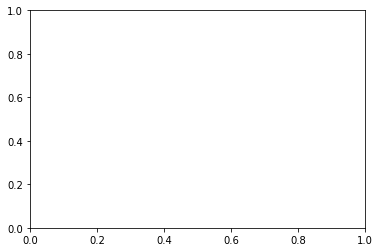

In [1009]:

plt.plot(time,quat_,label='gyro_angle drift',linewidth=1)
plt.show()

gyro_angle = []
gyro_tmp = 0
for (i,t) in enumerate(time[0:100000]):
    gyro_tmp = gyro_tmp + dt*((Gyro_z[i]  + 15.6256062561)/16.4)
    gyro_angle.append(gyro_tmp)

plt.plot(time,gyro_angle,label='gyro_angle drift',linewidth=1)
plt.show()

ValueError: x and y must be the same size

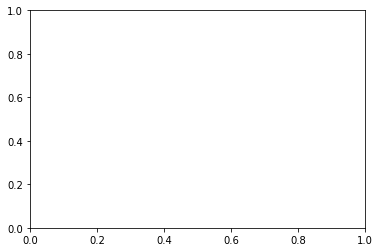

In [1010]:
plt.scatter(time,quat1_,label='gyro_angle drift',linewidth=1)
plt.show()
gyro_angle = []
gyro_tmp = 0
for (i,t) in enumerate(time[0:100000]):
    gyro_tmp = gyro_tmp + dt*((Gyro_z[i]  + 15.6256062561)/16.4)
    gyro_angle.append(gyro_tmp)

plt.scatter(time,gyro_angle,label='gyro_angle drift',linewidth=1)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (9998,) and (19996,)

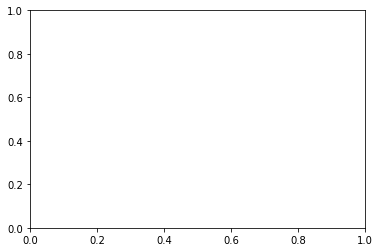

In [1011]:
plt.plot(time,quat2_,label='gyro_angle drift',linewidth=1)
plt.show()
gyro_angle = []
gyro_tmp = 0
for (i,t) in enumerate(time[0:100000]):
    gyro_tmp = gyro_tmp + dt*((Gyro_z[i]  + 15.6256062561)/16.4)
    gyro_angle.append(gyro_tmp)

plt.scatter(time,gyro_angle,label='gyro_angle drift',linewidth=1)
plt.show()